## Observations and Insights 

Observations and Insights
Based on the analysis here are a few bullet points of observations:

For all four treatments: Capomulin, Ramicane, Infubinol, and Ceftamin, the statistic means are close to medians and the SEMs are low, indicating the results are accurate and data sets are symmetrically distributed.
1. Comparing Capomulin to the other three most promising treatments( Ramicane, Infubinol, and Ceftamin), the statistics show that Capomulin treatment delivers similar result to Ramicane with slightly bigger average tumor volume indicating slightly worse performance. However, significantly better than the results from Infubinol and Ceftamin treatments. Final tumor volume analysis shows similar result: Capomulin treatment results slightly bigger average final tumors comparing to Ramicane treatment, while significantly smaller/better than the other two treatments.
2. Under Capomulin treatment the tumor volumes for most mice shrink down after a period of time.  
3. There is a strong positive relationship between tumor volumes and mice weights with high r value.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# print(mouse_metadata.head())
# print(study_results.head())

# Combine the data into a single dataset
data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how = 'inner')

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_count = len(data_df['Mouse ID'].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = data_df[data_df.duplicated()]['Mouse ID']
duplicate_id = duplicate_id.to_string(index=False)
duplicate_id
# Alternatively: dup = pd.DataFrame(data_df.groupby(['Mouse ID','Timepoint'])['Timepoint'].count())
# dup.loc[dup['Timepoint']>1,:]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data =data_df.loc[data_df['Mouse ID']== duplicate_id, :]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Remove all records of that Mouse ID and not just the duplicates.
clean_data_df = data_df.loc[data_df['Mouse ID'] != duplicate_id]
clean_data_df.head()
# Alternatively: dupliate_index = data_df[data_df['Mouse ID']==duplicate_id].index.values
# clean_data_df = data_df.drop(dupliate_index)  

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_data_df['Mouse ID'].unique())
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_group = clean_data_df.groupby(['Drug Regimen'])
regimen_stat = regimen_group['Tumor Volume (mm3)'].describe()
regimen_median = regimen_group['Tumor Volume (mm3)'].median()
regimen_var = regimen_stat['std']*regimen_stat['std']
regimen_sem = regimen_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_summary_stat = pd.DataFrame({"Mean Tumor Volume": regimen_stat['mean'],
                                     "Median Tumor Volume": regimen_median,
                                     "Tumor Volume Variance": regimen_var,
                                     "Tumor Volume Sd. Dev.": regimen_stat['std'],
                                     "Tumor Volume SEM": regimen_sem
                                    })
regimen_summary_stat



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Sd. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_group['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,st.sem])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

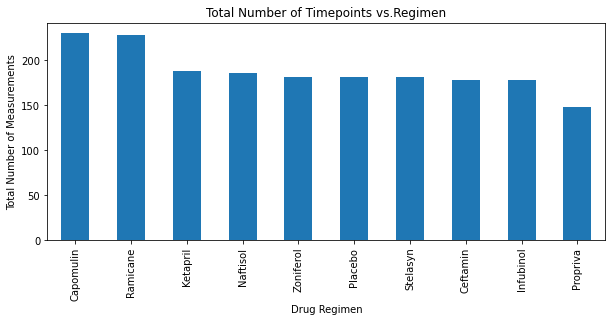

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints_regimen = regimen_group.Timepoint.count()
total_timepoints_regimen = total_timepoints_regimen.sort_values(ascending=False)
timepoints_regimen_pdchart = total_timepoints_regimen.plot(kind='bar', figsize=(10,4),title=("Total Number of Timepoints vs.Regimen") )
timepoints_regimen_pdchart.set_ylabel('Total Number of Measurements')
plt.show()

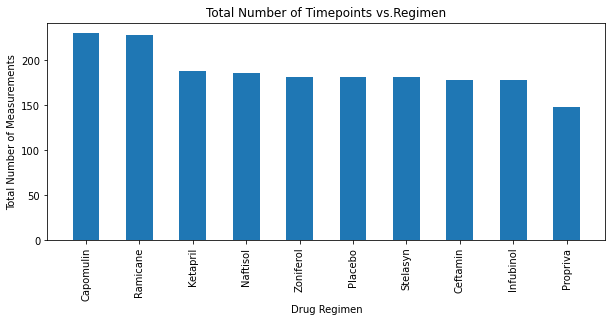

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = total_timepoints_regimen.keys()
x_axis = np.arange(len(drug_regimen))
plt.figure(figsize=(10, 4))
plt.bar(x_axis, total_timepoints_regimen,width=0.5)
plt.xticks(x_axis, drug_regimen,rotation=90)
plt.title("Total Number of Timepoints vs.Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements')
plt.show()

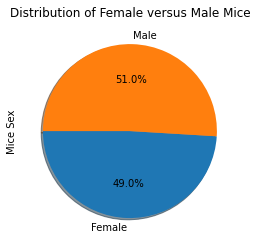

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = clean_data_df.groupby(['Sex'])
sex_count = sex_group.Sex.count()
sex_chart = sex_count.plot(kind='pie', y = sex_count, autopct = '%1.1f%%', shadow = True, startangle = 180, title = ('Distribution of Female versus Male Mice'))
sex_chart.set_ylabel('Mice Sex')
plt.show()

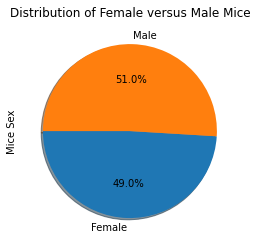

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_count.keys()
plt.pie(sex_count, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('Mice Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Last_timepoint_df = clean_data_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data_final = pd.merge(clean_data_df, Last_timepoint_df, on=['Mouse ID','Timepoint'])
clean_data_final = clean_data_final.rename(columns = {'Tumor Volume (mm3)':'Final Tumor Volume (mm3)'})
clean_data_final.head()



,Mouse ID,Timepoint,Final Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_index = clean_data_final.set_index(['Drug Regimen'])
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Locate the rows which contain mice on each drug and get the tumor volumes
treatment_set = [regimens_index.loc[x,'Final Tumor Volume (mm3)'] for x in selected_regimens]
     
# Determine outliers using upper and lower bounds  
set_count = range(len(treatment_set))
quartiles = [treatment_set[x].quantile([0.25,0.5,0.75]) for x in set_count]
lowerqs = [quartiles[x][0.25] for x in set_count]
upperqs = [quartiles[x][0.75] for x in set_count]
iqrs = [upperqs[x]-lowerqs[x] for x in set_count]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lower_bounds = [lowerqs[x] - (1.5*iqrs[x]) for x in set_count]
upper_bounds = [upperqs[x] + (1.5*iqrs[x]) for x in set_count]
outlier_occupancy = [treatment_set[x].loc[(treatment_set[x]<lower_bounds[x])|(treatment_set[x]>upper_bounds[x])] for x in set_count]

for x in set_count:
    print(f"{selected_regimens[x]}'s potential outliers:{outlier_occupancy[x]}")


Capomulin's potential outliers:Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:Drug Regimen
Infubinol    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Final Tumor Volume (mm3), dtype: float64)


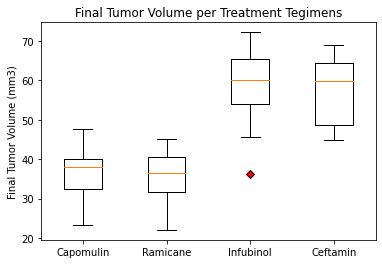

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Treatment Tegimens')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(treatment_set,flierprops=red_diamond)
plt.xticks([1, 2, 3, 4], selected_regimens)
plt.show()

## Line and Scatter Plots

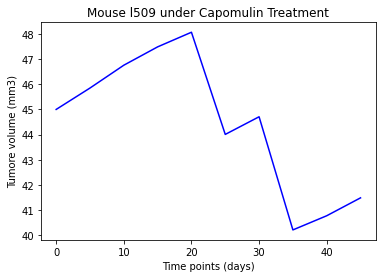

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
select_mouse_id = 'l509'
mouse_id_index = clean_data_df.set_index(['Mouse ID'])
select_mouse_data = mouse_id_index.loc[select_mouse_id,['Timepoint','Tumor Volume (mm3)' ]]
plt.plot(select_mouse_data['Timepoint'], select_mouse_data['Tumor Volume (mm3)'], color="blue") 
plt.title('Mouse l509 under Capomulin Treatment')
plt.xlabel('Time points (days)')
plt.ylabel('Tumore volume (mm3)')
plt.show()


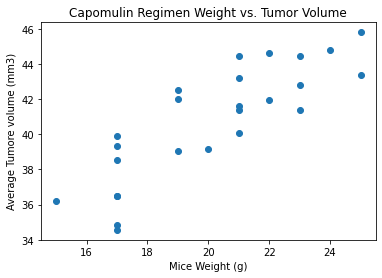

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_data_df.loc[clean_data_df['Drug Regimen']=='Capomulin',:]
weight_tumor_volume = capomulin_data.iloc[:,[0,7,2]].groupby(['Mouse ID']).mean()
plt.scatter(weight_tumor_volume['Weight (g)'],weight_tumor_volume['Tumor Volume (mm3)'])
plt.title('Capomulin Regimen Weight vs. Tumor Volume')
plt.xlabel('Mice Weight (g)')
plt.ylabel('Average Tumore volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.71


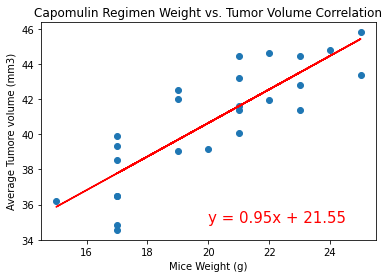

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_tumor_volume['Weight (g)']
y_values = weight_tumor_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title('Capomulin Regimen Weight vs. Tumor Volume Correlation')
plt.xlabel('Mice Weight (g)')
plt.ylabel('Average Tumore volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')
print(f'The r-squared is: {round(rvalue**2,2)}')
plt.show()

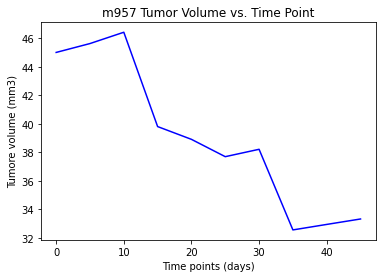

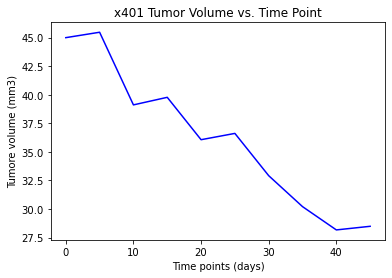

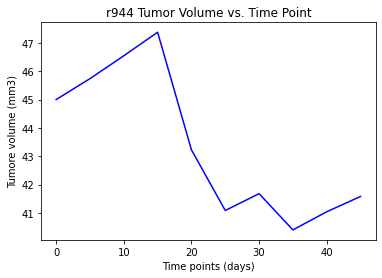

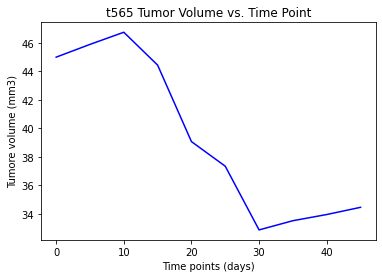

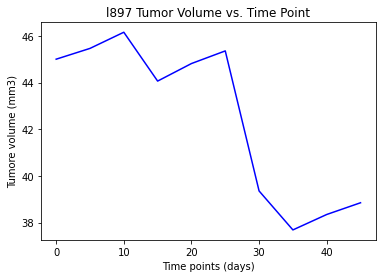

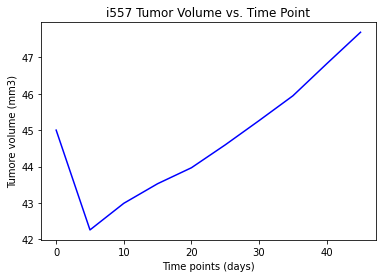

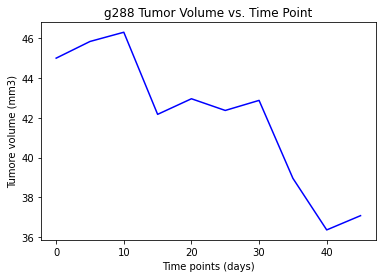

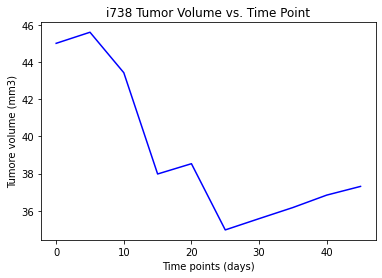

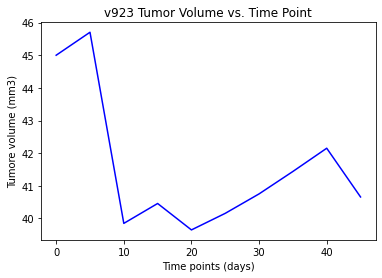

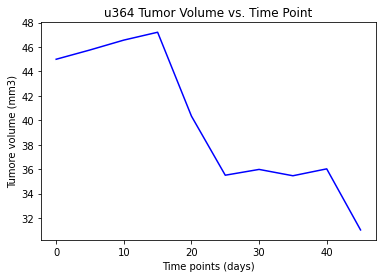

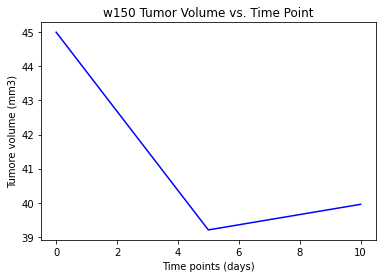

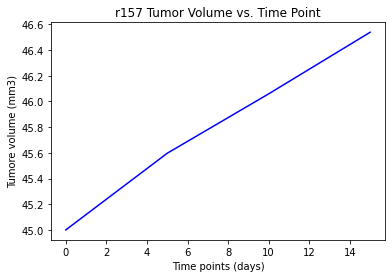

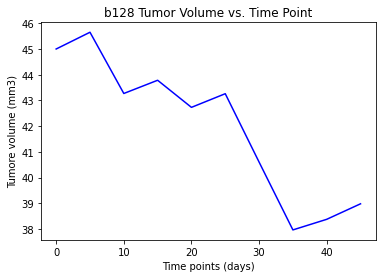

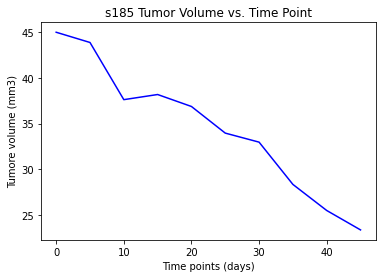

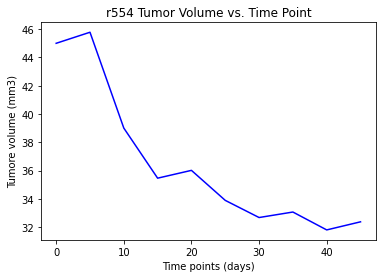

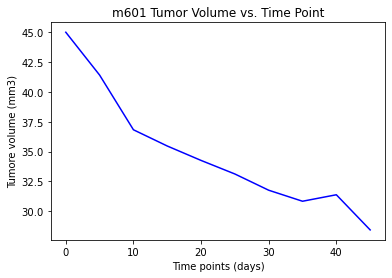

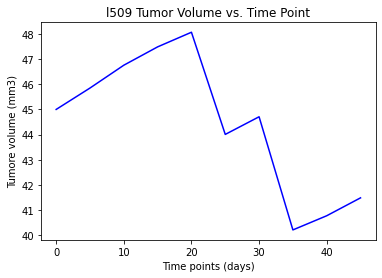

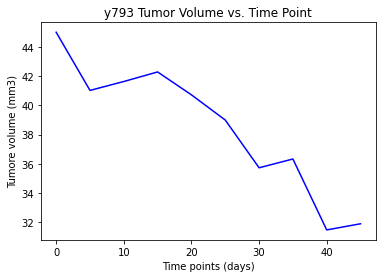

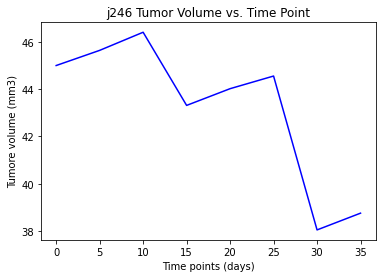

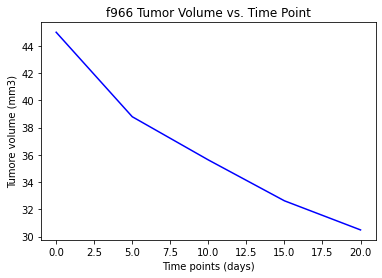

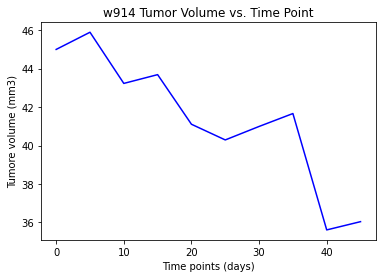

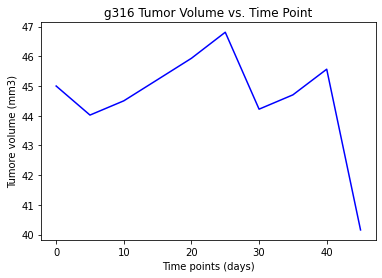

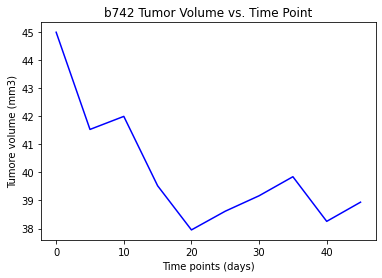

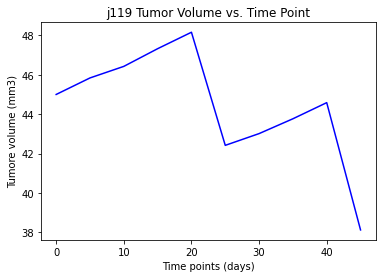

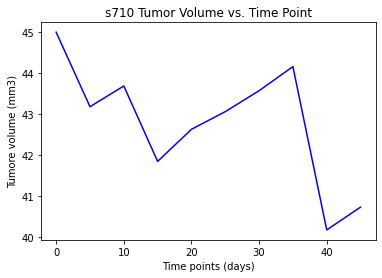

In [19]:
# Additional analysis: Check Tumor volume vs. Timepoint for all mice treated by Capomulin
mouse_id_index = capomulin_data.set_index(['Mouse ID'])
mouse_id = set(capomulin_data['Mouse ID'])

for x in mouse_id:

    select_mouse_id = x

    select_mouse_data = mouse_id_index.loc[select_mouse_id,['Timepoint','Tumor Volume (mm3)' ]]
    plt.plot(select_mouse_data['Timepoint'], select_mouse_data['Tumor Volume (mm3)'], color="blue") 
    plt.title(f'{select_mouse_id} Tumor Volume vs. Time Point')
    plt.xlabel('Time points (days)')
    plt.ylabel('Tumore volume (mm3)')
    plt.show()